In [25]:
import numpy as np
import scipy

#Gaussian Equation
class Gaussian(object):
    
    def __init__(self, mu, sigma):
        #Create a Gaussian Function
        self.sigma = np.matrix(sigma)
        self.mu = np.matrix(mu)
        
    def getProbability(self, x):
        #Get Probability that x belongs to this.G
        n = x.shape[0]
        detSigma = np.linalg.det(self.sigma)
        p = 1/( (((2*scipy.pi)**n)*detSigma)**0.5  ) * np.exp( -0.5*(x-self.mu).T*np.linalg.inv(self.sigma)*(x-self.mu) )
        return p
        

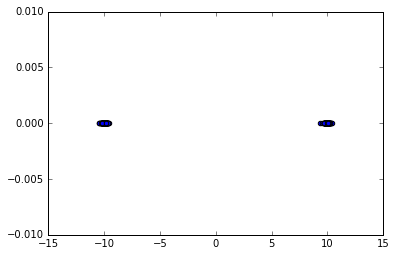

In [26]:
#Generate values from two distributions 
import matplotlib.pyplot as plt
%matplotlib inline
mu1 = -10.
std_dev1 = 0.2
mu2 = 10.
std_dev2 = 0.2

cluster1 = np.random.normal(mu1, std_dev1, 100)
cluster2 = np.random.normal(mu2, std_dev2, 100)

total = list(cluster1) + list(cluster2)
y = [0]*100
plt.scatter(cluster1, y)
plt.scatter(cluster2, y)
total = np.matrix(total)

In [27]:
#No. of Gaussians
N = 2

#Create N random centred Gaussians
mu1 = np.random.rand()*20
mu2 = np.random.rand()*-20
sigma = np.cov(total)
GMM = []
GMM.append(Gaussian(mu1, sigma))
GMM.append(Gaussian(mu2, sigma))
prior = [1./N]*N
import sys

In [28]:
for _ in range(10000):
    
    #Find which data point belongs to which Gaussian
    #Expectation
    cost = np.zeros((200, 2))
    for i in range(total.shape[1]):
        max = -1
        gaussianNumber = -1
        Posterior = []
        for j in range(len(GMM)):
            Posterior.append(GMM[j].getProbability(np.matrix(total[0,i]))*prior[j])
        summation = sum(Posterior)
        for j in range(len(GMM)):
            cost[i,j] = Posterior[j]/summation

    #Maximization
    for j in range(len(GMM)):
        prior[j] = np.mean(cost[:,j])  
        GMM[j].sigma = np.multiply(cost[:,j],(total[0,:]-GMM[j].mu)).dot((total[0,:]-GMM[j].mu).T)/np.sum(cost[:,j])
        GMM[j].mu = np.sum(np.multiply(cost[:,j], total[0,:]))/np.sum(cost[:,j])
    sys.stdout.write("\r" + str(GMM[1].mu))
    sys.stdout.flush()
    
    

-9.98517620121

KeyboardInterrupt: 